In [1]:
from constants import *
from scraper import *
df_s = get_arxiv_dataframe(subcats, max_results=50)
df_s.to_csv("arxiv_papers_cleaned.csv", index=False)
print(df_s.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessiezh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jessiezh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Fetching data for subcategory: cs.AI under cs...
Fetching data for subcategory: cs.AR under cs...
Fetching data for subcategory: cs.CC under cs...
Fetching data for subcategory: cs.CE under cs...
Fetching data for subcategory: cs.CG under cs...
Fetching data for subcategory: cs.CL under cs...
Fetching data for subcategory: cs.CR under cs...
Fetching data for subcategory: cs.CV under cs...
Fetching data for subcategory: cs.CY under cs...
Fetching data for subcategory: cs.DB under cs...
Fetching data for subcategory: cs.DC under cs...
Fetching data for subcategory: cs.DL under cs...
Fetching data for subcategory: cs.DM under cs...
Fetching data for subcategory: cs.DS under cs...
Fetching data for subcategory: cs.ET under cs...
Fetching data for subcategory: cs.FL under cs...
Fetching data for subcategory: cond-mat.dis-nn under cond-mat...
Fetching data for subcategory: cond-mat.mtrl-sci under cond-mat...
Fetching data for subcategory: cond-mat.mes-hall under cond-mat...
Fetching data for

In [1]:
import pandas as pd

# Load your clustered papers
df = pd.read_csv('clustering_results/papers_with_clusters.csv')

# Ignore noise points (-1 cluster)
df = df[df["cluster"] != -1]

# Group by subcategory
subcat_cluster_dist = df.groupby(['subcategory', 'cluster']).size().unstack(fill_value=0)

# Normalize to percentage
subcat_cluster_percent = subcat_cluster_dist.div(subcat_cluster_dist.sum(axis=1), axis=0)

# Show the distribution
print(subcat_cluster_percent)


cluster           0         1         2         3    4         5    6    7    \
subcategory                                                                    
astro-ph.CO  0.000000  0.000000  0.000000  0.159091  0.0  0.022727  0.0  0.0   
astro-ph.EP  0.000000  0.000000  0.219512  0.000000  0.0  0.000000  0.0  0.0   
astro-ph.GA  0.000000  0.000000  0.000000  0.225806  0.0  0.000000  0.0  0.0   
astro-ph.HE  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
astro-ph.IM  0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
...               ...       ...       ...       ...  ...       ...  ...  ...   
stat.CO      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
stat.ME      0.116279  0.116279  0.000000  0.000000  0.0  0.046512  0.0  0.0   
stat.ML      0.000000  0.000000  0.000000  0.000000  0.0  0.000000  0.0  0.0   
stat.OT      0.000000  0.000000  0.000000  0.000000  0.0  0.111111  0.0  0.0   
stat.TH      0.000000  0.000000  0.00000

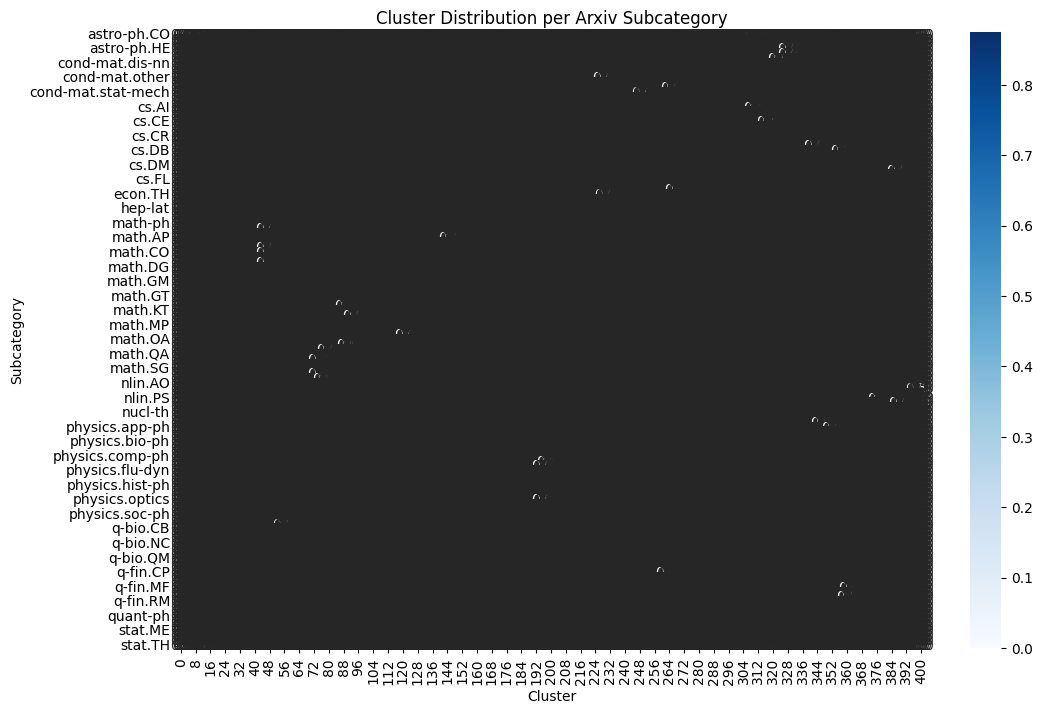

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(subcat_cluster_percent, cmap="Blues", annot=True, fmt=".1f")
plt.title("Cluster Distribution per Arxiv Subcategory")
plt.xlabel("Cluster")
plt.ylabel("Subcategory")
plt.show()